In [2]:
import json
from jsonpath_ng.ext import parse
import matplotlib.pyplot as plt
from statistics import mean
import numpy
import math

## SINGLE DAY SCATTER

In [2]:
with open("C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\2022\\09\\2022-09-15.json","r",encoding='utf-8') as datosJson:
	data = json.load(datosJson)
#Parse inicial de precios y creación de lista que los almacena
precios = []
for pr in parse("$..PrecioProducto").find(data):
	precios.append(float(pr.value.replace(",",".")))
#Parse inicial de localidades y creación de lista que las almacena
places = []
for mu in parse("$..Municipio").find(data):
    places.append(mu.value)
indices = [i for i in range(len(precios))]

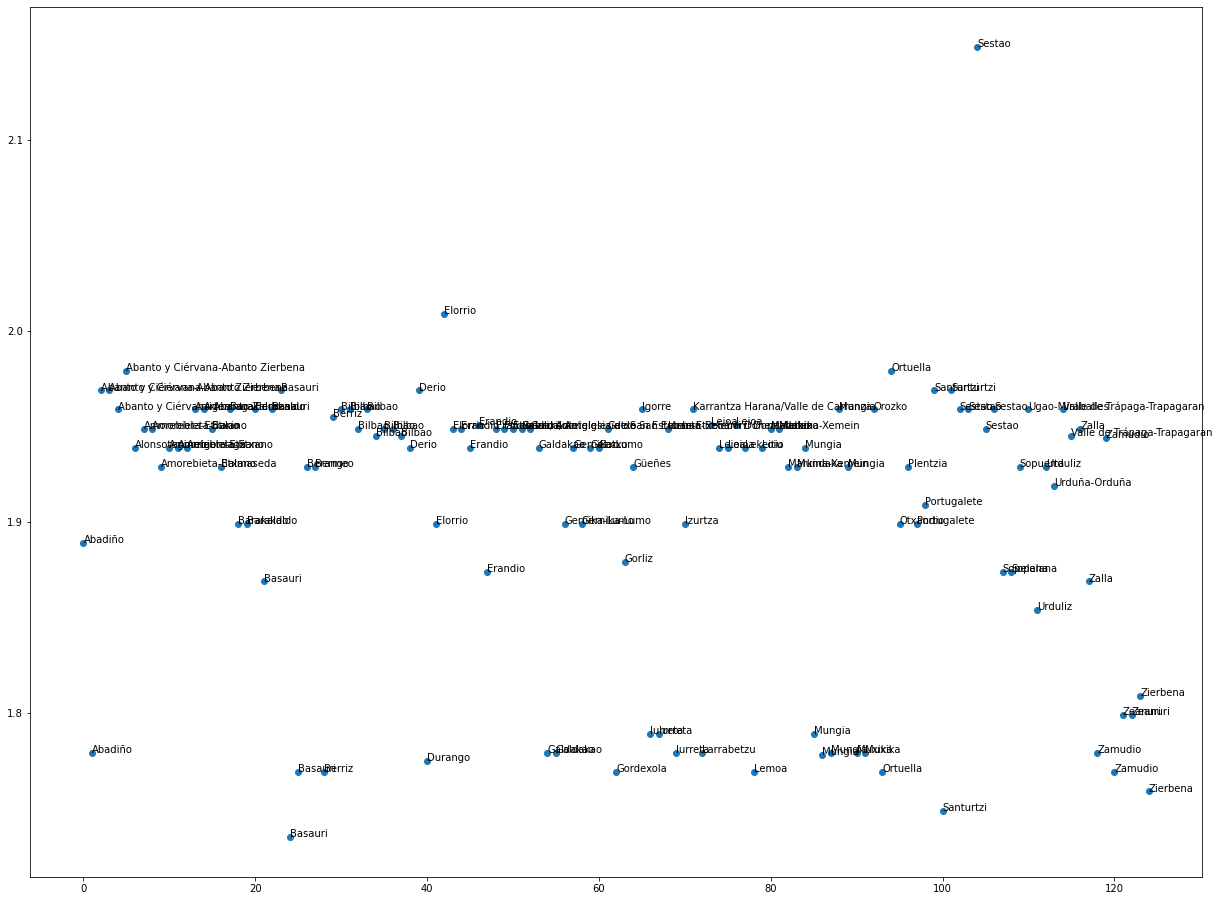

In [3]:
#Crear figura de tamaño adecuado, luego scatterplot y después poner etiquetas
plt.figure(figsize=[21, 16])
plt.scatter(indices,precios)
for p in range(len(places)):
    plt.annotate(places[p],(indices[p],precios[p]))

## ONE YEAR COMPARISON BETWEEN BRANDS (SAME PLACE)

In [9]:
y = "2020"
pl = "Arrigorriaga"
brands = ["AVIA AJARTE","PETRONOR"]
precios ={}
for b in brands:
	precios[b] = []
for m in range(1,13):
	m = str(m)
	if len(m) == 1:
		m = '0'+ m
	for d in range(1,32):
		d = str(d)
		if len(d) == 1:
			d = '0'+ d
		try:
			with open(f"C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\{y}\\{m}\\{y}-{m}-{d}.json","r",encoding='utf-8') as datosJson:
				data = json.load(datosJson)
			for pr in parse(f"$.ListaEESSPrecio[?(@.Rotulo =~ '{brands[0]}' & @.Municipio =~ '{pl}')].PrecioProducto").find(data):
				precios[brands[0]].append(float(pr.value.replace(",",".")))
			for pr in parse(f"$.ListaEESSPrecio[?(@.Rotulo =~ '{brands[1]}' & @.Municipio =~ '{pl}')].PrecioProducto").find(data):
				precios[brands[1]].append(float(pr.value.replace(",",".")))
		except (FileNotFoundError, FileExistsError):
			continue

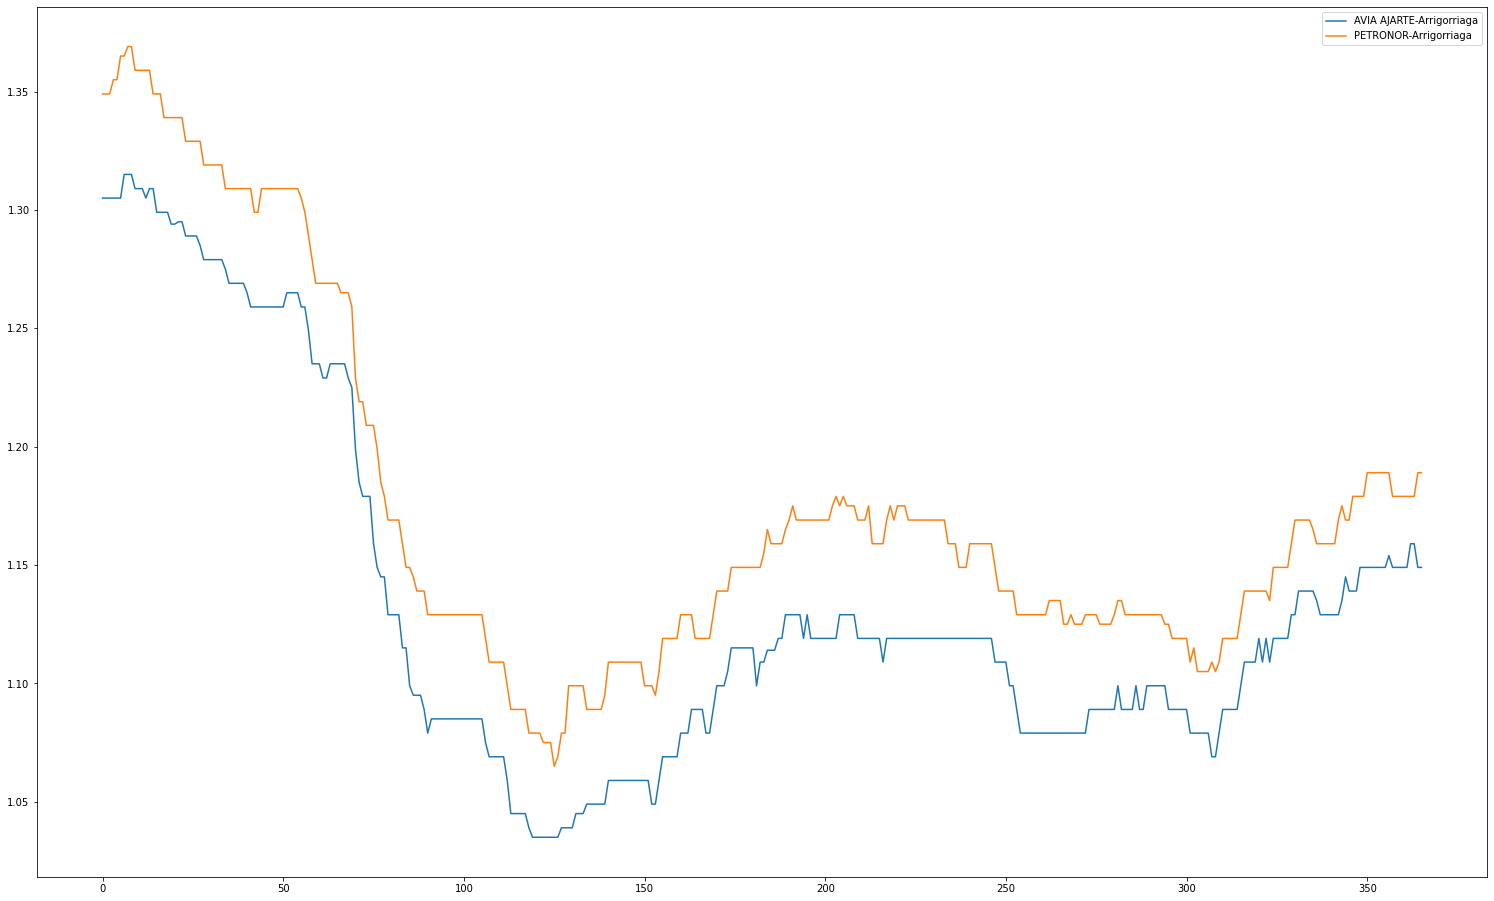

In [10]:
plt.figure(figsize=[26, 16])
for i in precios:
	plt.plot(precios[i],label= f"{i}-{pl}")
plt.legend()
pass

## LIFETIME PRICE FOR A SINGLE STATION

In [13]:
pl = "Basauri"
brands = ["EROSKI"]
precios ={}
for b in brands:
	precios[b] = []
for y in range(2007,2023):
    y = str(y)
    for m in range(1,13):
        m = str(m)
        if len(m) == 1:
            m = '0'+ m
        for d in range(1,32):
            d = str(d)
            if len(d) == 1:
                d = '0'+ d
            try:
                with open(f"C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\{y}\\{m}\\{y}-{m}-{d}.json","r",encoding='utf-8') as datosJson:
                    data = json.load(datosJson)
                    for pr in parse(f"$.ListaEESSPrecio[?(@.Rotulo =~ '{brands[0]}' & @.Municipio =~ '{pl}')].PrecioProducto").find(data):
                        precios[brands[0]].append(float(pr.value.replace(",",".")))
            except (FileNotFoundError, FileExistsError):
                continue

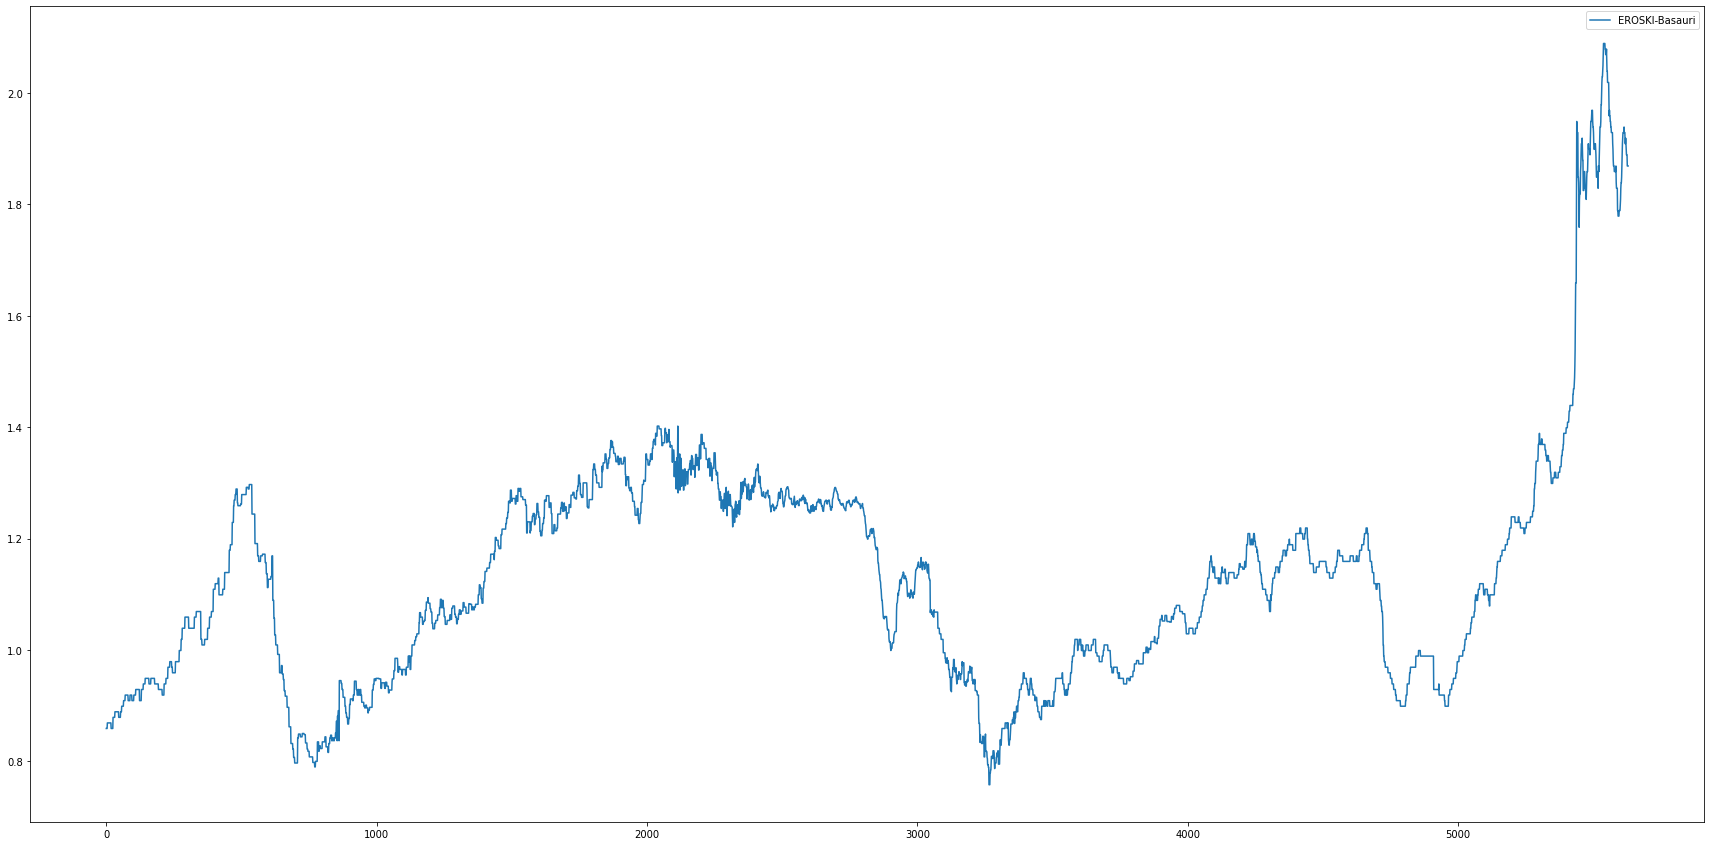

In [15]:
plt.figure(figsize=[30, 15])
for i in precios:
	plt.plot(precios[i],label= f"{i}-{pl}")
plt.legend()
pass

## VISUALIZE YTD CHANGES

In [6]:
y = "2020"
pl = "Erandio"
brands = ["PETRONOR"]
precios ={}
for b in brands:
	precios[b] = []
for m in range(1,13):
	m = str(m)
	if len(m) == 1:
		m = '0'+ m
	for d in range(1,32):
		d = str(d)
		if len(d) == 1:
			d = '0'+ d
		try:
			with open(f"C:\\Users\\pelli\\Desktop\\datos gasolineras\\data\\{y}\\{m}\\{y}-{m}-{d}.json","r",encoding='utf-8') as datosJson:
				data = json.load(datosJson)
			for pr in parse(f"$.ListaEESSPrecio[?(@.Rotulo =~ '{brands[0]}' & @.Municipio =~ '{pl}')].PrecioProducto").find(data):
				print(pr.value)
			print("")
		except (FileNotFoundError, FileExistsError):
			continue

1,319
1,335
1,335

1,335
1,335
1,319

1,319
1,335
1,335

1,319
1,335
1,335

1,319
1,335
1,335

1,345
1,345
1,329

1,329
1,345
1,345

1,345
1,345
1,329

1,345
1,345
1,329

1,339
1,339
1,325

1,329
1,329
1,319

1,329
1,329
1,319

1,329
1,329
1,319

1,329
1,329
1,329

1,325
1,325
1,325

1,319
1,319
1,319

1,319
1,319
1,319

1,315
1,315
1,315

1,315
1,315
1,315

1,315
1,315
1,315

1,309
1,309
1,309

1,309
1,309
1,309

1,309
1,309
1,309

1,305
1,299
1,299

1,305
1,299
1,299

1,305
1,299
1,299

1,305
1,299
1,299

1,299
1,295
1,295

1,295
1,289
1,289

1,289
1,289
1,295

1,289
1,289
1,295

1,289
1,289
1,295

1,289
1,289
1,295

1,295
1,289
1,289

1,285
1,285
1,279

1,279
1,279
1,275

1,279
1,279
1,275

1,275
1,275
1,275

1,275
1,275
1,275

1,275
1,275
1,275

1,275
1,275
1,275

1,275
1,275
1,275

1,269
1,269
1,269

1,269
1,269
1,269

1,269
1,279
1,279

1,269
1,279
1,279

1,269
1,279
1,279

1,269
1,279
1,279

1,269
1,279
1,279

1,269
1,279
1,279

1,279
1,279
1,269

1,269
1,279
1,279

1,269
1,279
